<a href="https://colab.research.google.com/github/neerajthandayan/Tensorflow-2.0/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [2]:
# Importing dataset

data = tf.keras.datasets.mnist
(M_train,n_train), (M_test,n_test) = data.load_data()
M_train, M_test = M_train/255, M_test/255

In [3]:
# Checking Data Shape

M_train.shape

(60000, 28, 28)

In [4]:
# Constructing Model

clf = tf.keras.models.Sequential()
clf.add(tf.keras.layers.Flatten(input_shape=(28,28)))
clf.add(tf.keras.layers.Dense(256, activation='relu'))
clf.add(tf.keras.layers.Dropout(0.2))
clf.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
# Compiling Data

clf.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [6]:
# Fitting Data

result = clf.fit(M_train,n_train, validation_data=(M_test,n_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4180 - accuracy: 0.8760 - val_loss: 0.1105 - val_accuracy: 0.9651
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1174 - accuracy: 0.9636 - val_loss: 0.0814 - val_accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0829 - accuracy: 0.9744 - val_loss: 0.0816 - val_accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0624 - accuracy: 0.9812 - val_loss: 0.0729 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0495 - accuracy: 0.9842 - val_loss: 0.0634 - val_accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9856 - val_loss: 0.0644 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0636 - val_accuracy:

In [7]:
# Evaluating Model

print(f'Classification Model Performance:\nLoss: {clf.evaluate(M_test,n_test)[0]}\nAccuracy: {round(clf.evaluate(M_test,n_test)[1]*100,2)}%')

313/313 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9814
Classification Model Performance:
Loss: 0.06496468186378479
Accuracy: 98.14%


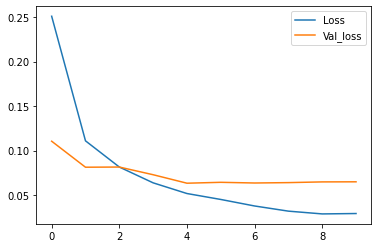

In [8]:
# Plotting Loss

plt.plot(result.history['loss'], label='Loss')
plt.plot(result.history['val_loss'], label='Val_loss')
plt.legend()

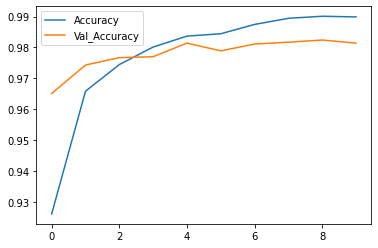

In [9]:
# Plotting Accuracy

plt.plot(result.history['accuracy'], label='Accuracy')
plt.plot(result.history['val_accuracy'], label='Val_Accuracy')
plt.legend()

Confusion matrix, without normalization
[[ 968    0    2    1    1    2    2    2    2    0]
 [   0 1125    3    0    0    0    2    1    4    0]
 [   0    1 1017    2    1    0    1    6    4    0]
 [   0    1    5  995    0    4    0    3    2    0]
 [   1    0    5    0  961    0    6    0    1    8]
 [   2    0    0    8    1  871    2    1    6    1]
 [   2    3    0    1    1    6  942    1    2    0]
 [   1    5   13    2    1    0    0 1001    2    3]
 [   1    0    5    7    3    3    1    3  948    3]
 [   1    3    0    3    7    2    0    5    2  986]]


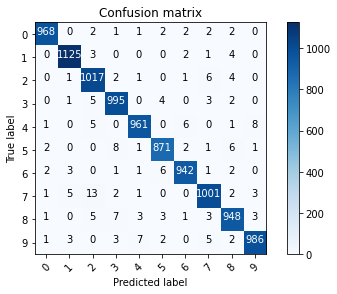

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = clf.predict(M_test).argmax(axis=1)
cm = confusion_matrix(n_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

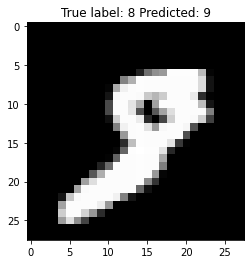

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != n_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(M_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (n_test[i], p_test[i]));